In [1]:
import numpy as np
from model.bilrp import VggLayers, vgg_gamma
from utils import load_image, proc_image
from visualization.plotting import plot_relevances, clip, get_alpha

In [2]:
# Loading image pairs
file1, file2 = 'data/0.jpg', 'data/1.jpg'
img1, img2 = load_image(file1), load_image(file2)

# Loading BiLRP-VGG-16 similarity model using feature from layer 31
feature_layer = '31' 
h,w = img1.shape[:2]
model = VggLayers(feature_layer=feature_layer, h=h,  w= w, embedding_size = 100, proj_case='random', seed=5)
model.cuda()
model.eval()

VggLayers(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

### 1) Computing BiLRP relevances 

In [3]:
poolsize = [8]
X1, X2 = proc_image(file1), proc_image(file2)
R = model.bilrp(X1.cuda(),X2.cuda(), poolsize=poolsize, gamma_func=vgg_gamma)

### 2) Visualize


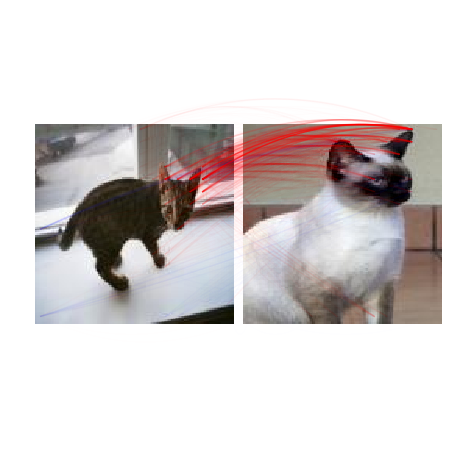

In [5]:
fname = None
clip_func = lambda x: get_alpha(clip(x,clim1=[-0.25,0.25], clim2= [-13,13]), p=2)

indices = np.indices(R.shape)
inds_all = [(i, R[i[0], i[1], i[2], i[3]]) for i in indices.reshape((4, np.prod(indices.shape[1:]))).T]  

plot_relevances(inds_all,img1, img2 ,clip_func, poolsize, fname=fname, curvefac=1.7)